In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/STLEE/FOMC/My Project/textdf/singlesent_rated_df.csv',index_col=0)
df.head()

,date,Rate,Change,cleantext,singlesentence,singlesentence_processed,Policy,Rates,Inflation,Labor,Tone
0,18/5/1999,4.75,0.00,The Federal Reserve released the following sta...,The Federal Reserve released the following sta...,the federal reserve released the following sta...,4,3,4,3,4
1,18/5/1999,4.75,0.00,The Federal Reserve released the following sta...,Trend increases in costs and core prices have ...,trend increases in costs and core prices have ...,3,3,2,3,2
2,18/5/1999,4.75,0.00,The Federal Reserve released the following sta...,But domestic financial markets have recovered ...,but domestic financial markets have recovered ...,3,3,3,3,5
3,18/5/1999,4.75,0.00,The Federal Reserve released the following sta...,Against the background of already-tight domest...,against the background of already-tight domest...,3,3,5,5,5
4,30/6/1999,5.00,0.25,The Federal Open Market Committee today voted ...,The Federal Open Market Committee today voted ...,the federal open market committee today voted ...,4,4,3,3,4


In [3]:
df.shape

(2376, 11)

In [4]:
#Review class proportion
df['Tone'].value_counts()

3    812
1    507
4    392
5    357
2    308
Name: Tone, dtype: int64

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model  import LogisticRegression

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [9]:
import matplotlib.pyplot as plt

# Rate Direction Prediction

In [74]:
#Split out response
#df_y = pd.DataFrame(df['Tone'])
#df_X = pd.DataFrame(df['singlesentence'])
df_y = df['Rates']
df_X = df['singlesentence']

#df_y = np.ravel(df_y)
#rint(type(df_y))
#rint(df_X.columns)

In [75]:
#x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, stratify=df_y, random_state=3)

In [47]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.7s


Grid best parameter (max. MCC):  {'clf__alpha': 0.01, 'clf__fit_prior': True, 'tfidf__ngram_range': (2, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Grid best score (MCC):  0.8398557251364405
              precision    recall  f1-score   support

           1     0.8333    0.9091    0.8696        11
           2     1.0000    0.8333    0.9091         6
           3     0.9986    0.9866    0.9926       748
           4     0.7308    1.0000    0.8444        19
           5     0.0000    0.0000    0.0000         1

    accuracy                         0.9834       785
   macro avg     0.7125    0.7458    0.7231       785
weighted avg     0.9886    0.9834    0.9854       785

Test score (MCC):  0.8429642146657279
[[ 10   0   1   0   0]
 [  1   5   0   0   0]
 [  0   0 738   7   3]
 [  0   0   0  19   0]
 [  1   0   0   0   0]]


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.6s finished


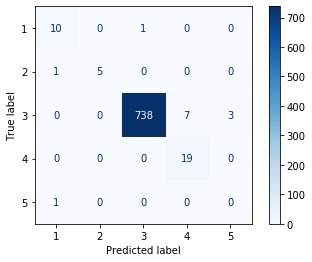

In [48]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'MultinomialNaiveBayes'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', MultinomialNB())])

grid_values = {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
               'clf__alpha': [1, 1e-1, 1e-2],
               'clf__fit_prior': [True, False]}

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    1.2s


Grid best parameter (max. MCC):  {'clf__dual': True, 'clf__penalty': 'l2', 'tfidf__ngram_range': (2, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': False}
Grid best score (MCC):  0.9038165267723173
              precision    recall  f1-score   support

           1     0.9091    0.9091    0.9091        11
           2     1.0000    0.8333    0.9091         6
           3     0.9973    1.0000    0.9987       748
           4     1.0000    1.0000    1.0000        19
           5     0.0000    0.0000    0.0000         1

    accuracy                         0.9962       785
   macro avg     0.7813    0.7485    0.7634       785
weighted avg     0.9949    0.9962    0.9955       785

Test score (MCC):  0.9573657553893254
[[ 10   0   1   0   0]
 [  0   5   1   0   0]
 [  0   0 748   0   0]
 [  0   0   0  19   0]
 [  1   0   0   0   0]]


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.0s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


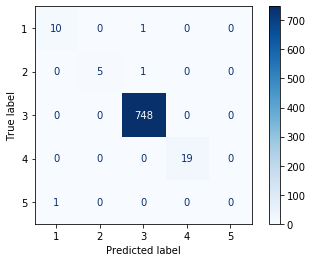

In [49]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'LinearSVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', LinearSVC())])

grid_values = [{'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l2'],
                'clf__dual':[True,False]},
                {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l1'],
                'clf__dual': [False]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   26.9s


Grid best parameter (max. MCC):  {'clf__C': 50, 'clf__degree': 0, 'clf__gamma': 'auto', 'clf__kernel': 'linear', 'tfidf__norm': 'l1', 'tfidf__use_idf': False}
Grid best score (MCC):  0.9103018525028569
              precision    recall  f1-score   support

           1     0.9091    0.9091    0.9091        11
           2     1.0000    1.0000    1.0000         6
           3     0.9987    0.9987    0.9987       748
           4     0.9500    1.0000    0.9744        19
           5     0.0000    0.0000    0.0000         1

    accuracy                         0.9962       785
   macro avg     0.7716    0.7816    0.7764       785
weighted avg     0.9950    0.9962    0.9956       785

Test score (MCC):  0.9581012597779923
[[ 10   0   1   0   0]
 [  0   6   0   0   0]
 [  0   0 747   1   0]
 [  0   0   0  19   0]
 [  1   0   0   0   0]]


[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   30.6s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


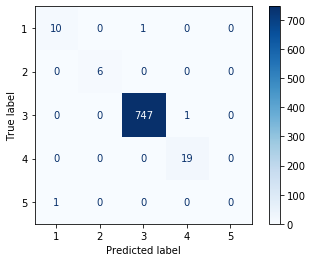

In [76]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'SVM.SVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', svm.SVC())])

grid_values = [{
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__kernel':['linear','rbf','poly'],
                'clf__gamma':['auto'],
                'clf__C':[0.1,10,20,50,75,100],
                'clf__degree':[0, 1, 2, 3, 4, 5, 6]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

# Rate Direction Prediction (Unique Text)

In [69]:
dfunique=df.drop_duplicates('singlesentence')

In [70]:
df_y = dfunique['Rates']
df_X = dfunique['singlesentence']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, stratify=df_y, random_state=3)

In [72]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    3.6s


Grid best parameter (max. MCC):  {'clf__alpha': 0.01, 'clf__fit_prior': True, 'tfidf__ngram_range': (2, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Grid best score (MCC):  0.8668792203878837
              precision    recall  f1-score   support

           1     0.9091    0.9091    0.9091        11
           2     1.0000    0.8333    0.9091         6
           3     0.9927    0.9856    0.9891       416
           4     0.7619    0.8889    0.8205        18
           5     0.0000    0.0000    0.0000         1

    accuracy                         0.9757       452
   macro avg     0.7327    0.7234    0.7256       452
weighted avg     0.9794    0.9757    0.9772       452

Test score (MCC):  0.8453044917032564
[[ 10   0   1   0   0]
 [  1   5   0   0   0]
 [  0   0 410   4   2]
 [  0   0   2  16   0]
 [  0   0   0   1   0]]


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.7s finished


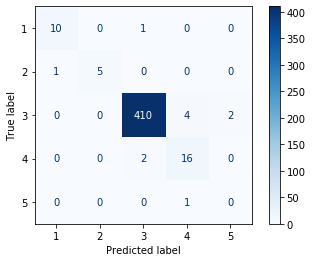

In [15]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'MultinomialNaiveBayes'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', MultinomialNB())])

grid_values = {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
               'clf__alpha': [1, 1e-1, 1e-2],
               'clf__fit_prior': [True, False]}

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s


Grid best parameter (max. MCC):  {'clf__dual': True, 'clf__penalty': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': False}
Grid best score (MCC):  0.9631594427590908
              precision    recall  f1-score   support

           1     0.9091    0.9091    0.9091        11
           2     1.0000    0.8333    0.9091         6
           3     0.9905    1.0000    0.9952       416
           4     1.0000    0.8889    0.9412        18
           5     0.0000    0.0000    0.0000         1

    accuracy                         0.9889       452
   macro avg     0.7799    0.7263    0.7509       452
weighted avg     0.9868    0.9889    0.9876       452

Test score (MCC):  0.9242562245765679
[[ 10   0   1   0   0]
 [  0   5   1   0   0]
 [  0   0 416   0   0]
 [  0   0   2  16   0]
 [  1   0   0   0   0]]


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.3s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


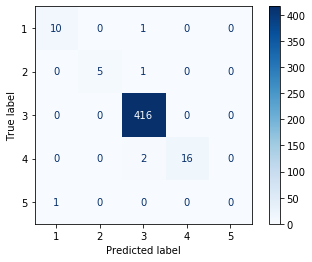

In [16]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'LinearSVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', LinearSVC())])

grid_values = [{'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l2'],
                'clf__dual':[True,False]},
                {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l1'],
                'clf__dual': [False]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:   13.2s


Grid best parameter (max. MCC):  {'clf__C': 10, 'clf__degree': 0, 'clf__gamma': 'auto', 'clf__kernel': 'linear', 'tfidf__norm': 'l2', 'tfidf__use_idf': False}
Grid best score (MCC):  0.9478002620742837
              precision    recall  f1-score   support

           1     0.9000    0.8182    0.8571        11
           2     1.0000    1.0000    1.0000         6
           3     0.9904    0.9952    0.9928       416
           4     1.0000    0.8889    0.9412        18
           5     0.0000    0.0000    0.0000         1

    accuracy                         0.9845       452
   macro avg     0.7781    0.7405    0.7582       452
weighted avg     0.9865    0.9845    0.9853       452

Test score (MCC):  0.8949238262065959
[[  9   0   2   0   0]
 [  0   6   0   0   0]
 [  0   0 414   0   2]
 [  0   0   2  16   0]
 [  1   0   0   0   0]]


[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   17.8s finished


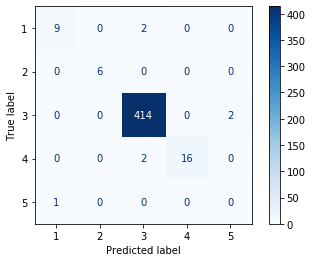

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'SVM.SVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', svm.SVC())])

grid_values = [{
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__kernel':['linear','rbf','poly'],
                'clf__gamma':['auto'],
                'clf__C':[0.1,10,20,50,75,100],
                'clf__degree':[0, 1, 2, 3, 4, 5, 6]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

# Tone Prediction

In [65]:
#Split out response
#df_y = pd.DataFrame(df['Tone'])
#df_X = pd.DataFrame(df['singlesentence'])
df_y = df['Tone']
df_X = df['singlesentence']

#df_y = np.ravel(df_y)
#rint(type(df_y))
#rint(df_X.columns)

In [66]:
#x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, stratify=df_y, random_state=3)

In [11]:
log_cols = ["Classifier", "MCC Score","Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

In [67]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


Grid best parameter (max. MCC):  {'clf__alpha': 0.01, 'clf__fit_prior': True, 'tfidf__ngram_range': (2, 2), 'tfidf__norm': 'l1', 'tfidf__use_idf': True}
Grid best score (MCC):  0.7771083280665833
              precision    recall  f1-score   support

           1     0.8333    0.8995    0.8651       189
           2     0.7111    0.4324    0.5378        74
           3     0.9220    0.9455    0.9336       275
           4     0.7217    0.7545    0.7378       110
           5     0.7914    0.8029    0.7971       137

    accuracy                         0.8344       785
   macro avg     0.7959    0.7670    0.7743       785
weighted avg     0.8299    0.8344    0.8285       785

Test score (MCC):  0.7815732402138628
[[170   3   7   0   9]
 [ 19  32   3  16   4]
 [  5   2 260   4   4]
 [  6   2   7  83  12]
 [  4   6   5  12 110]]


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.9s finished


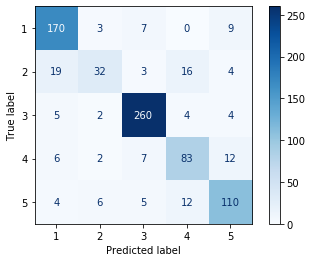

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'MultinomialNaiveBayes'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', MultinomialNB())])

grid_values = {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
               'clf__alpha': [1, 1e-1, 1e-2],
               'clf__fit_prior': [True, False]}

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 out of 180 | elapsed:    1.2s remaining:    1.1s


Grid best parameter (max. MCC):  {'clf__dual': True, 'clf__penalty': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Grid best score (MCC):  0.8076523355552737
              precision    recall  f1-score   support

           1     0.8571    0.9206    0.8878       189
           2     0.7288    0.5811    0.6466        74
           3     0.9640    0.9745    0.9693       275
           4     0.8532    0.8455    0.8493       110
           5     0.8309    0.8248    0.8278       137

    accuracy                         0.8803       785
   macro avg     0.8468    0.8293    0.8362       785
weighted avg     0.8774    0.8803    0.8777       785

Test score (MCC):  0.842195484536083
[[174   4   2   2   7]
 [ 20  43   2   3   6]
 [  2   0 268   1   4]
 [  2   6   3  93   6]
 [  5   6   3  10 113]]


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.3s finished


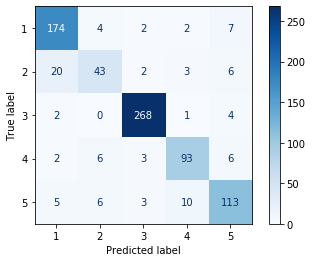

In [42]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'LinearSVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', LinearSVC())])

grid_values = [{'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l2'],
                'clf__dual':[True,False]},
                {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l1'],
                'clf__dual': [False]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

In [43]:
myreview='The labor market remains depressed, but inflation is improving.'

In [44]:
print(clf_grid.predict([myreview]))

[1]


Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:  2.3min finished


Grid best parameter (max. MCC):  {'clf__C': 10, 'clf__degree': 0, 'clf__gamma': 'auto', 'clf__kernel': 'linear', 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Grid best score (MCC):  0.8050822441860515
              precision    recall  f1-score   support

           1     0.8431    0.9101    0.8753       189
           2     0.6353    0.7297    0.6792        74
           3     0.9491    0.9491    0.9491       275
           4     0.9091    0.8182    0.8612       110
           5     0.9098    0.8102    0.8571       137

    accuracy                         0.8764       785
   macro avg     0.8493    0.8435    0.8444       785
weighted avg     0.8815    0.8764    0.8775       785

Test score (MCC):  0.8379694856985442
[[172   8   4   1   4]
 [ 14  54   2   3   1]
 [  5   3 261   2   4]
 [  4  10   4  90   2]
 [  9  10   4   3 111]]


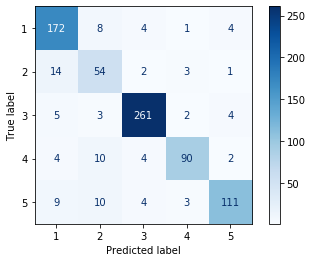

In [68]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'SVM.SVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', svm.SVC())])

grid_values = [{
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__kernel':['linear','rbf','poly'],
                'clf__gamma':['auto'],
                'clf__C':[0.1,10,20,50,75,100],
                'clf__degree':[0, 1, 2, 3, 4, 5, 6]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

# Tone Prediction (Unique Text)

In [78]:
dfunique=df.drop_duplicates('singlesentence')

In [79]:
df_y = dfunique['Tone']
df_X = dfunique['singlesentence']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, stratify=df_y, random_state=3)

In [81]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.4s


Grid best parameter (max. MCC):  {'clf__alpha': 0.01, 'clf__fit_prior': True, 'tfidf__ngram_range': (2, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Grid best score (MCC):  0.6657288732279383
              precision    recall  f1-score   support

           1     0.7426    0.6818    0.7109       110
           2     0.4265    0.5179    0.4677        56
           3     0.8876    0.7596    0.8187       104
           4     0.6375    0.6711    0.6538        76
           5     0.6404    0.6887    0.6636       106

    accuracy                         0.6792       452
   macro avg     0.6669    0.6638    0.6630       452
weighted avg     0.6951    0.6792    0.6849       452

Test score (MCC):  0.5963252662080382
[[75 14  3  6 12]
 [13 29  1  6  7]
 [ 4  5 79  4 12]
 [ 0 12  3 51 10]
 [ 9  8  3 13 73]]


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.4s finished


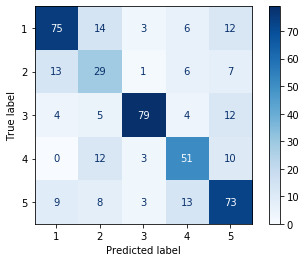

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'MultinomialNaiveBayes'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', MultinomialNB())])

grid_values = {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
               'clf__alpha': [1, 1e-1, 1e-2],
               'clf__fit_prior': [True, False]}

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 out of 180 | elapsed:    0.9s remaining:    0.8s


Grid best parameter (max. MCC):  {'clf__dual': True, 'clf__penalty': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Grid best score (MCC):  0.6829928782744509
              precision    recall  f1-score   support

           1     0.7905    0.7545    0.7721       110
           2     0.5185    0.5000    0.5091        56
           3     0.8515    0.8269    0.8390       104
           4     0.7000    0.6447    0.6712        76
           5     0.6967    0.8019    0.7456       106

    accuracy                         0.7323       452
   macro avg     0.7114    0.7056    0.7074       452
weighted avg     0.7336    0.7323    0.7317       452

Test score (MCC):  0.6609230934739048
[[83  8  5  3 11]
 [12 28  1  9  6]
 [ 2  4 86  2 10]
 [ 0  9  8 49 10]
 [ 8  5  1  7 85]]


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.4s finished


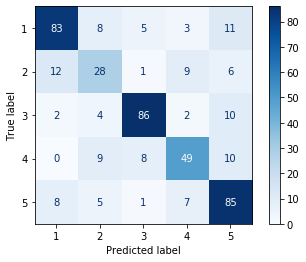

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'LinearSVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', LinearSVC())])

grid_values = [{'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l2'],
                'clf__dual':[True,False]},
                {'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__penalty':['l1'],
                'clf__dual': [False]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   56.2s finished


Grid best parameter (max. MCC):  {'clf__C': 50, 'clf__degree': 0, 'clf__gamma': 'auto', 'clf__kernel': 'linear', 'tfidf__norm': 'l1', 'tfidf__use_idf': True}
Grid best score (MCC):  0.6758699010577398
Grid best std dev (MCC):  0.0307694313701114
              precision    recall  f1-score   support

           1     0.7368    0.7636    0.7500       110
           2     0.5000    0.6071    0.5484        56
           3     0.8804    0.7788    0.8265       104
           4     0.6753    0.6842    0.6797        76
           5     0.7624    0.7264    0.7440       106

    accuracy                         0.7257       452
   macro avg     0.7110    0.7121    0.7097       452
weighted avg     0.7362    0.7257    0.7294       452

Test score (MCC):  0.6543306562073749
[[84 15  5  4  2]
 [13 34  0  6  3]
 [ 6  3 81  4 10]
 [ 1 10  4 52  9]
 [10  6  2 11 77]]


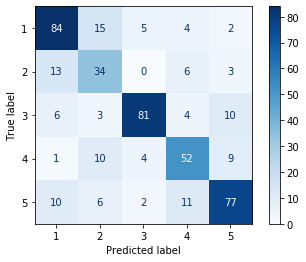

In [84]:
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=3)
cv.get_n_splits(x_train,y_train)

log = pd.DataFrame()
i=1
Name = 'SVM.SVC'

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words=stopwords)),
                 ('clf', svm.SVC())])

grid_values = [{
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
                'clf__kernel':['linear','rbf','poly'],
                'clf__gamma':['auto'],
                'clf__C':[0.1,10,20,50,75,100],
                'clf__degree':[0, 1, 2, 3, 4, 5, 6]}]

MCC_scoring = make_scorer(matthews_corrcoef)
clf_grid = GridSearchCV(pipe, param_grid = grid_values, cv = cv, scoring = MCC_scoring, verbose=3, n_jobs = -1)
clf_grid.fit(x_train,y_train)

param_opt = clf_grid.best_params_
print('Grid best parameter (max. MCC): ', clf_grid.best_params_)
print('Grid best score (MCC): ', clf_grid.best_score_)
print('Grid best std dev (MCC): ',clf_grid.cv_results_['std_test_score'][clf_grid.best_index_])

y_pred=clf_grid.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print('Test score (MCC): ', matthews_corrcoef(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_grid, x_test, y_test, cmap=plt.cm.Blues, values_format='.0f')